In [153]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
from pandas import plotting
import numpy as np


pandas.set_option('display.max_columns', None)

pandas.set_option('display.max_rows', None) 
#pandas.set_option('display.max_rows', 10)  

pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)
pandas.set_option('display.precision', 3)

# Read the data

In [134]:
data = pandas.read_csv(r'../RawDatasets/bank-additional-full.csv',  sep=';', na_values=".")
#data=data.drop(['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)

display(data[0:10])

age          job  marital            education  default housing loan    contact month day_of_week  duration  campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y
0   56    housemaid  married             basic.4y       no      no   no  telephone   may         mon       261         1    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0  no
1   57     services  married          high.school  unknown      no   no  telephone   may         mon       149         1    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0  no
2   37     services  married          high.school       no     yes   no  telephone   may         mon       226         1    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0  no
3   40       admin.  married             basic.6y       no      no   no  telephone   may         mon       151         1    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0  no
4   56     services  married          high.school       no      no  yes  telephone   may         mon       307         1    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0  no
5   45     services  married             basic.9y  unknown      no   no  telephone   may         mon       198         1    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0  no
6   59       admin.  married  professional.course       no      no   no  telephone   may         mon       139         1    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0  no
7   41  blue-collar  married              unknown  unknown      no   no  telephone   may         mon       217         1    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0  no
8   24   technician   single  professional.course       no     yes   no  telephone   may         mon       380         1    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0  no
9   25     services   single          high.school       no     yes   no  telephone   may         mon        50         1    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0  no

# Grouping columns per type of variable

In [98]:
#numericCols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
#categoricalCols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

numericCols = data.select_dtypes(include=np.number).columns.tolist()
categoricalCols = data.select_dtypes(include=object).columns.tolist()
print("Numeric columns:", len(numericCols))
print("Categorical columns:", len(categoricalCols))
print("Total:", len(numericCols) + len(categoricalCols))

Numeric columns: 10
Categorical columns: 11
Total: 21


# Univariate description of the raw data

In [99]:
#data.describe(include='all')
print("Numeric columns:")
data.describe(include=[np.number])

Numeric columns:


age   duration   campaign      pdays   previous  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
count  41188.000  41188.000  41188.000  41188.000  41188.000     41188.000       41188.000      41188.000  41188.000    41188.000
mean      40.024    258.285      2.568    962.475      0.173         0.082          93.576        -40.503      3.621     5167.036
std       10.421    259.279      2.770    186.911      0.495         1.571           0.579          4.628      1.734       72.252
min       17.000      0.000      1.000      0.000      0.000        -3.400          92.201        -50.800      0.634     4963.600
25%       32.000    102.000      1.000    999.000      0.000        -1.800          93.075        -42.700      1.344     5099.100
50%       38.000    180.000      2.000    999.000      0.000         1.100          93.749        -41.800      4.857     5191.000
75%       47.000    319.000      3.000    999.000      0.000         1.400          93.994        -36.400      4.961     5228.100
max       98.000   4918.000     56.000    999.000      7.000         1.400          94.767        -26.900      5.045     5228.100

In [100]:
print("Categorical columns:")
data.describe(include=[object])

Categorical columns:


job  marital          education default housing   loan   contact  month day_of_week     poutcome      y
count    41188    41188              41188   41188   41188  41188     41188  41188       41188        41188  41188
unique      12        4                  8       3       3      3         2     10           5            3      2
top     admin.  married  university.degree      no     yes     no  cellular    may         thu  nonexistent     no
freq     10422    24928              12168   32588   21576  33950     26144  13769        8623        35563  36548

## Boxplots and histograms for numeric variables

Numeric variables:
Age:


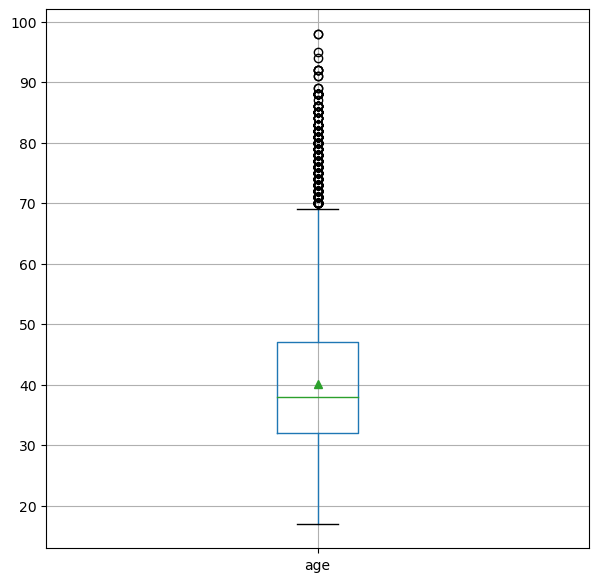

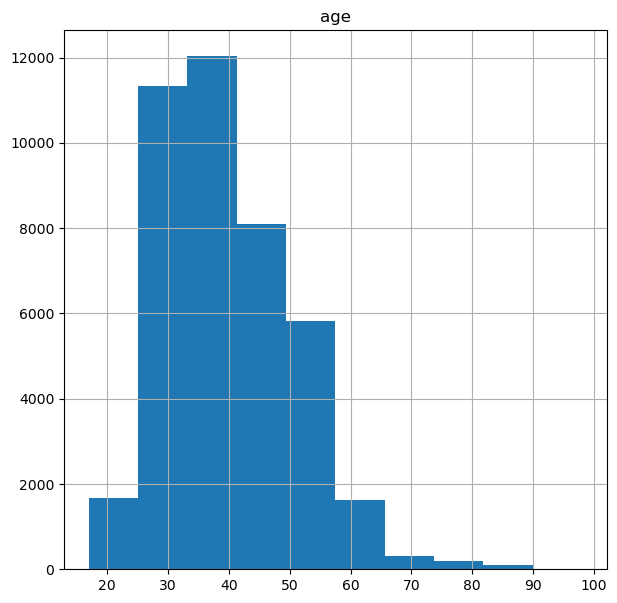

Duration:


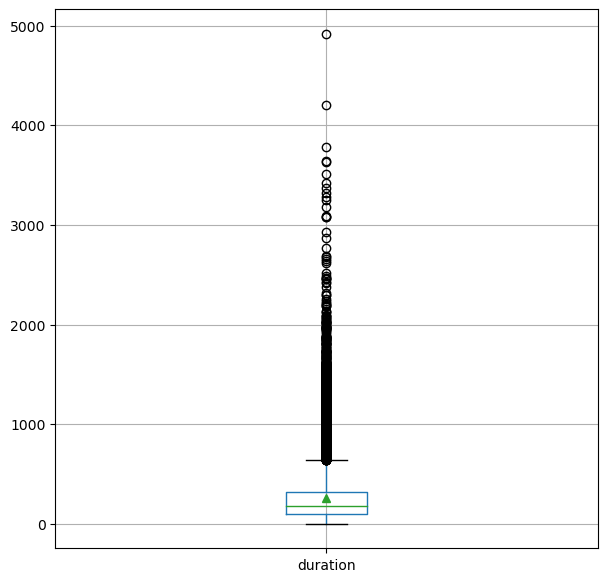

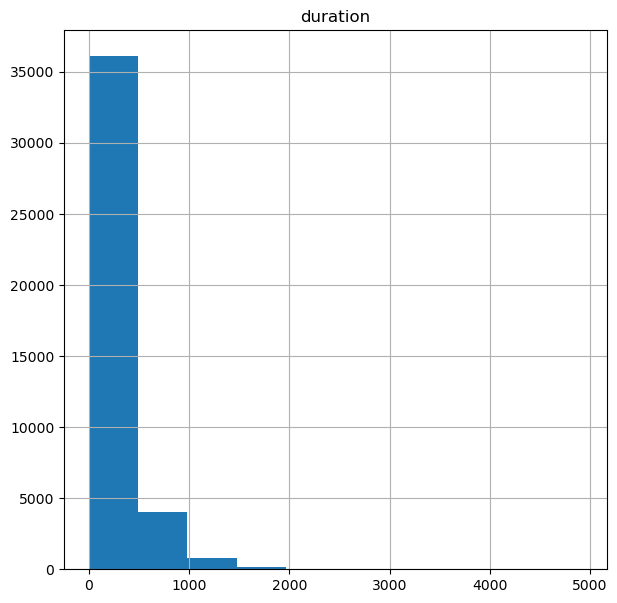

Campaign:


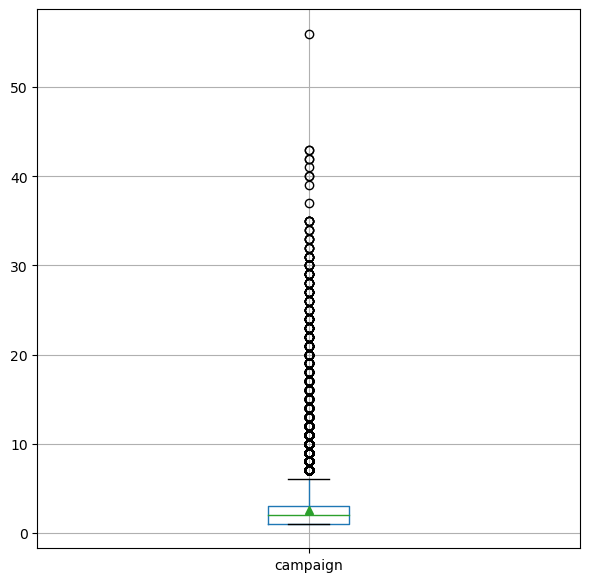

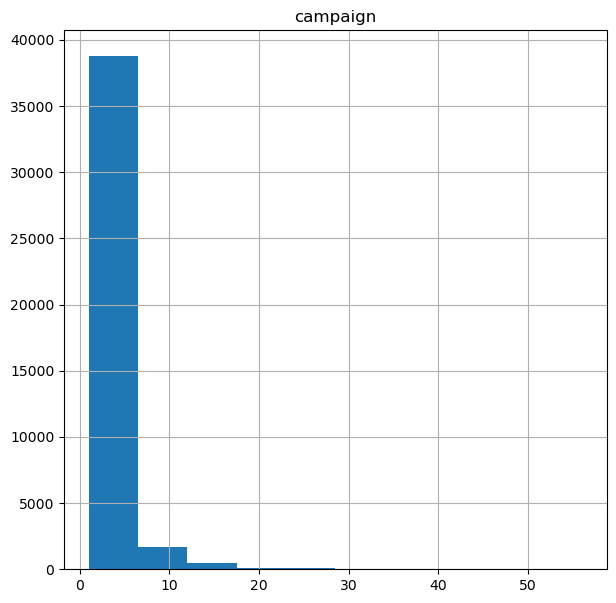

Pdays:


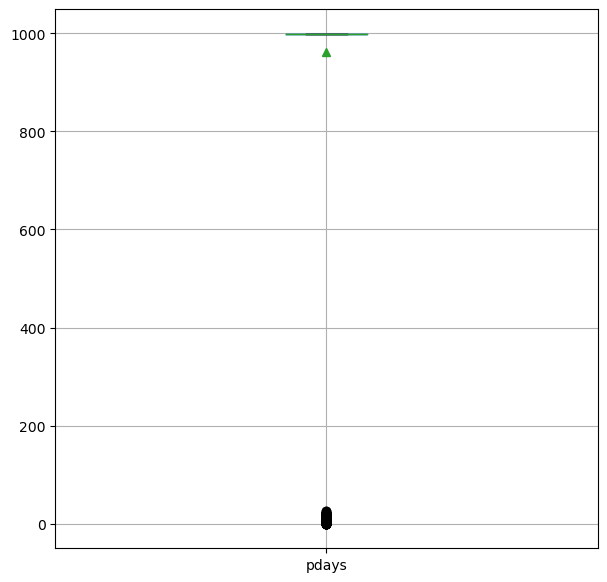

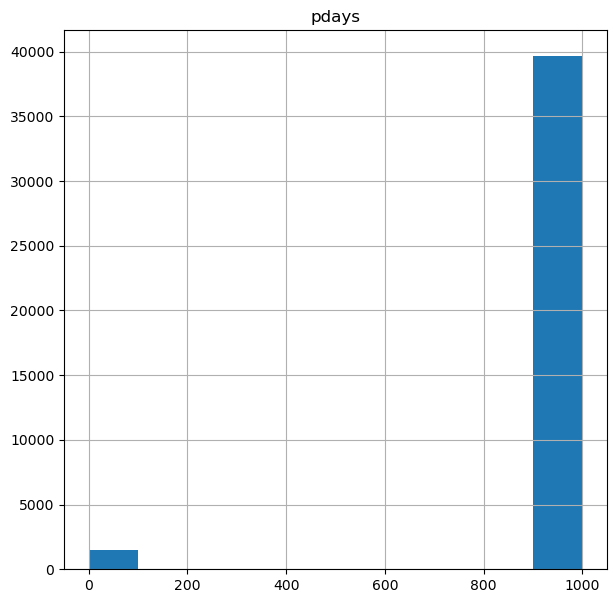

Previous:


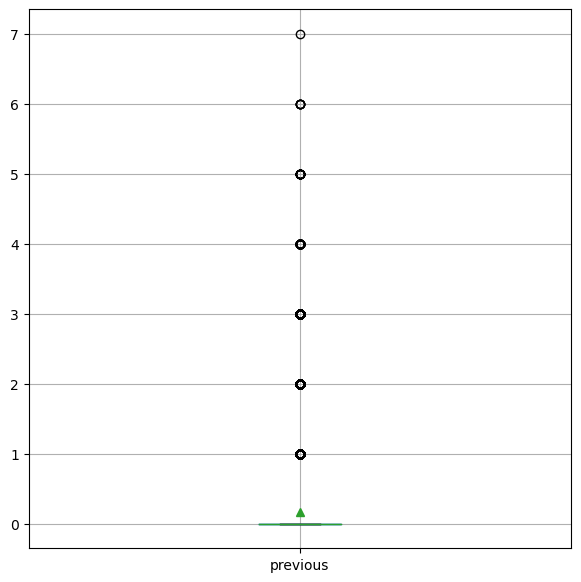

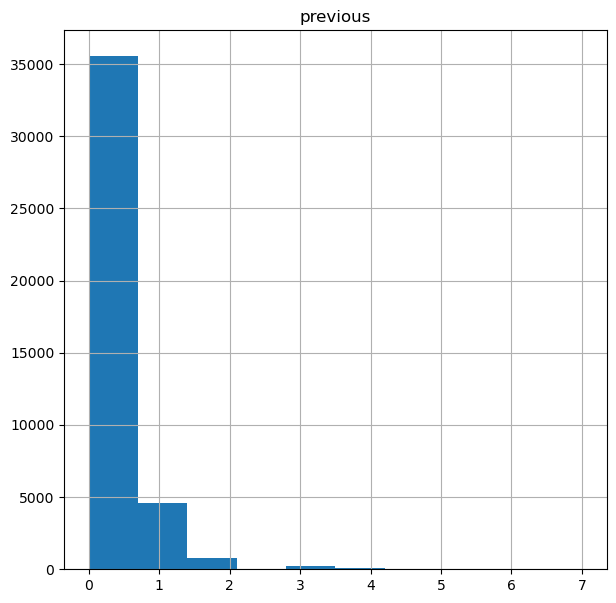

Emp.var.rate:


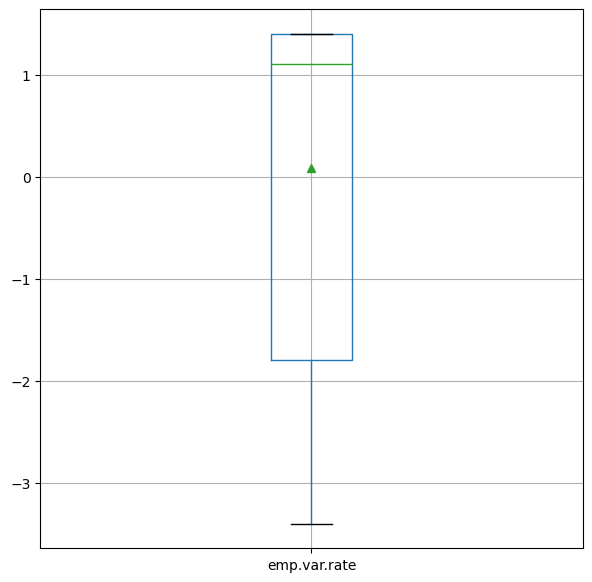

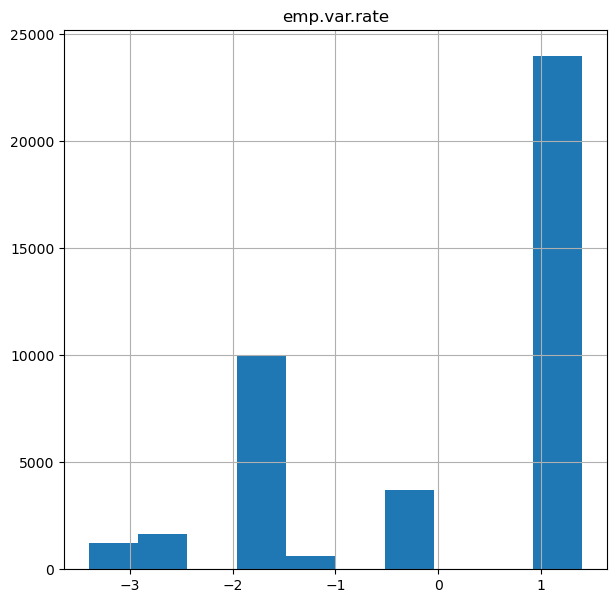

Cons.price.idx:


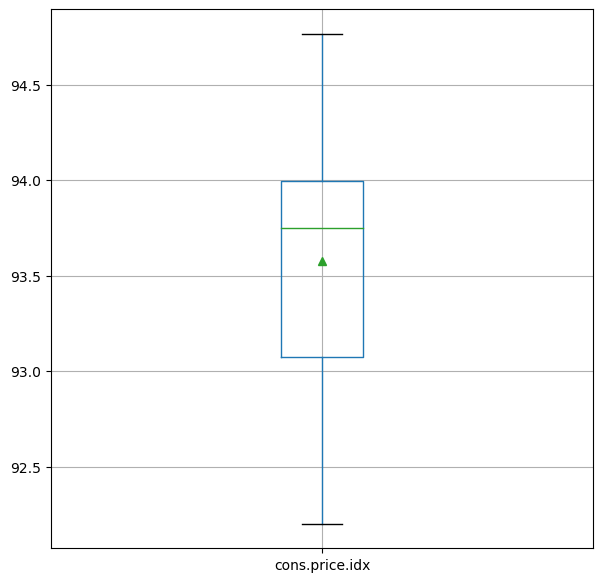

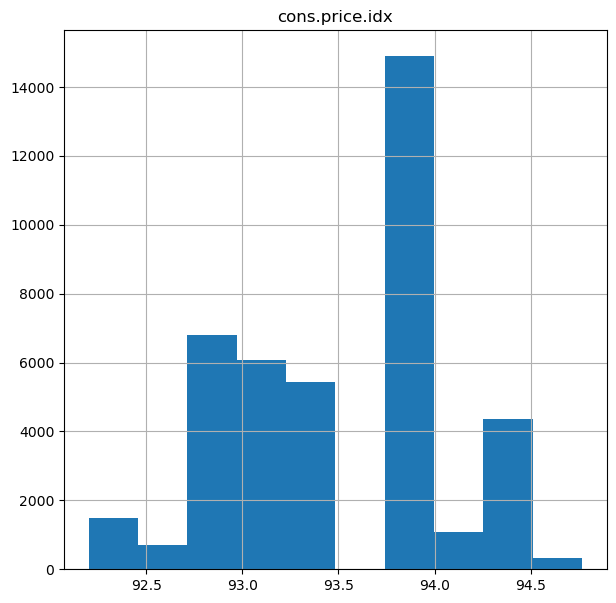

Cons.conf.idx:


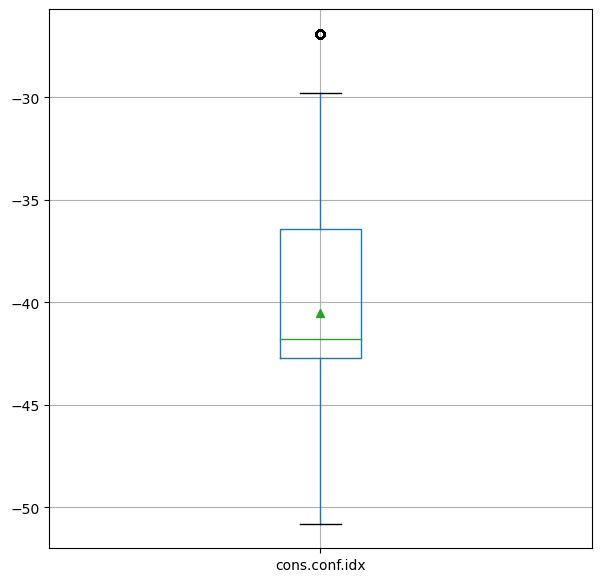

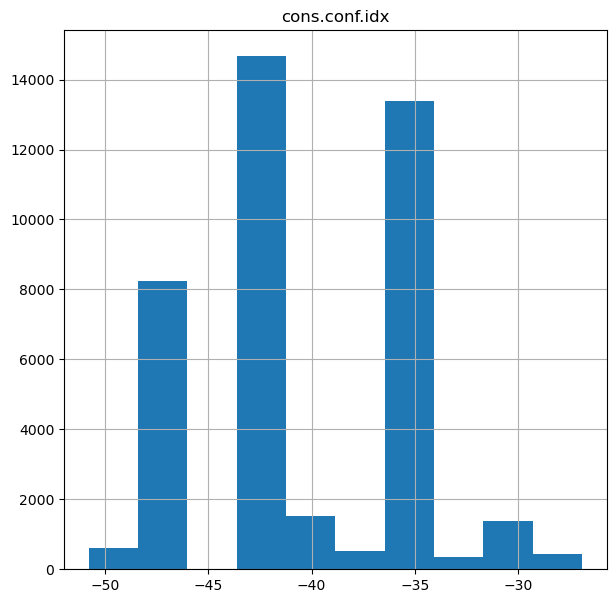

Euribor3m:


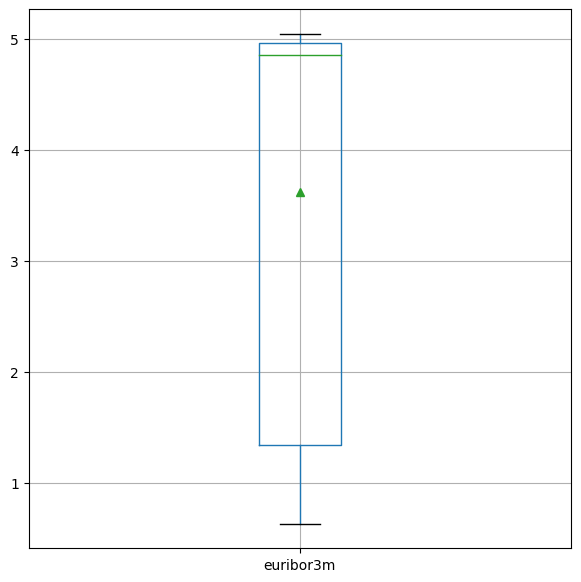

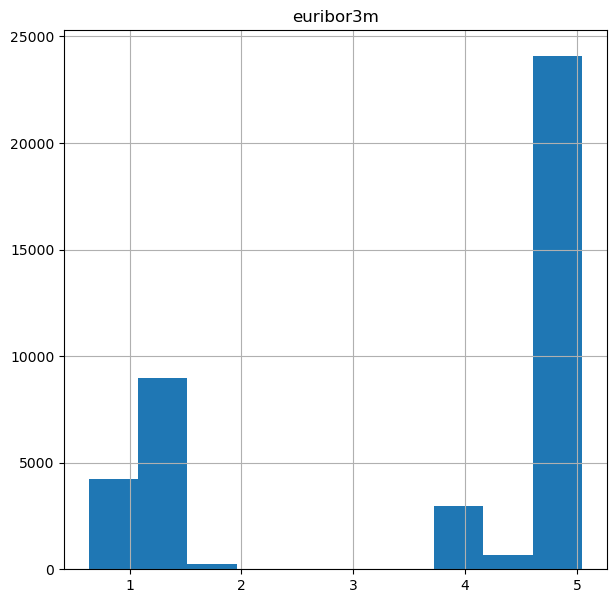

Nr.employed:


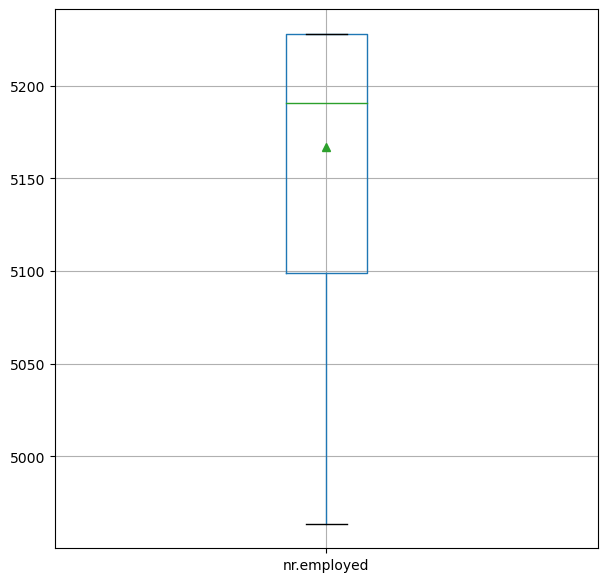

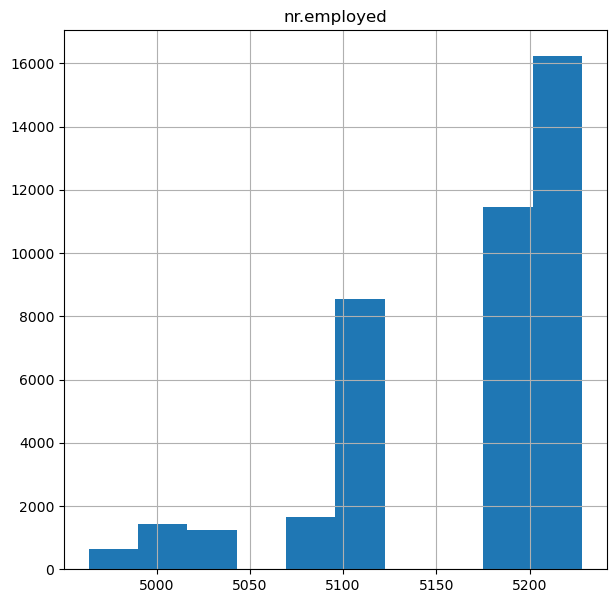

In [101]:
print("Numeric variables:")
for col in numericCols:
    print(col.capitalize() + ":")
    #plt.figure()
    #plt.plot()
    data.boxplot(column=col, meanline=False, showmeans=True, return_type='dict', figsize=[7,7])
    data.hist(column=col,  bins=10, figsize=[7,7])
    plt.show()

## Histograms for categorical variables

Categorical variables:
Job:


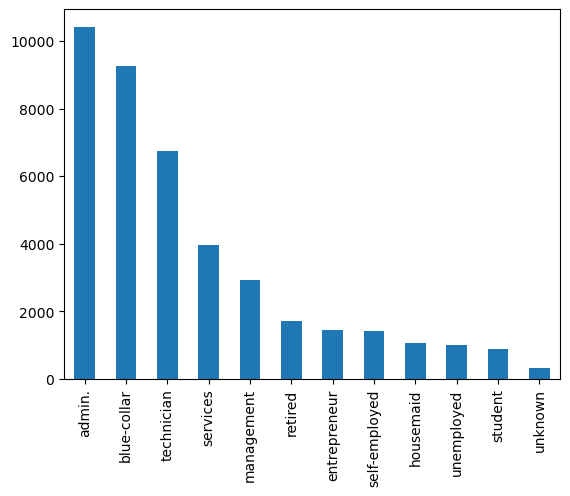

Marital:


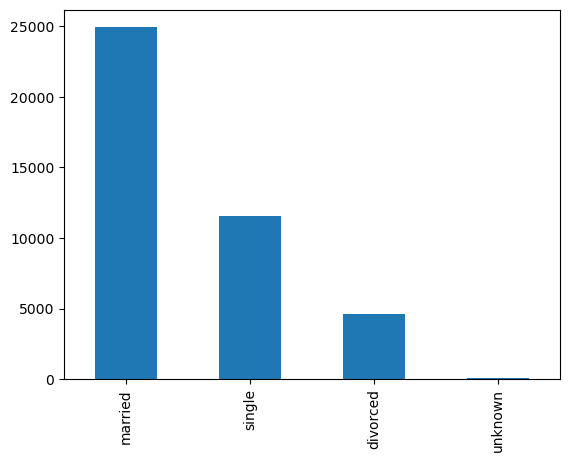

Education:


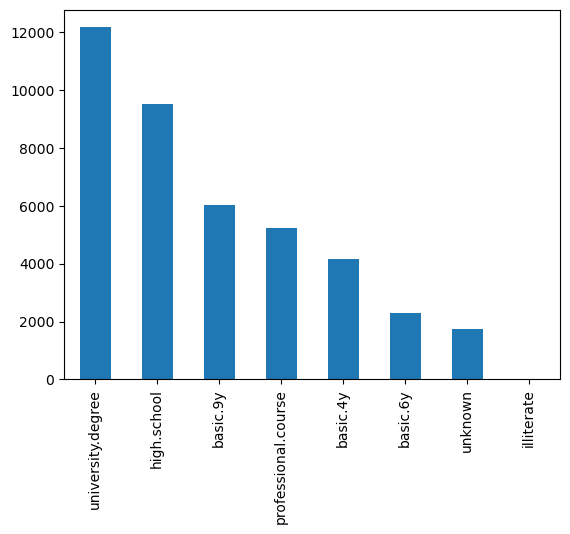

Default:


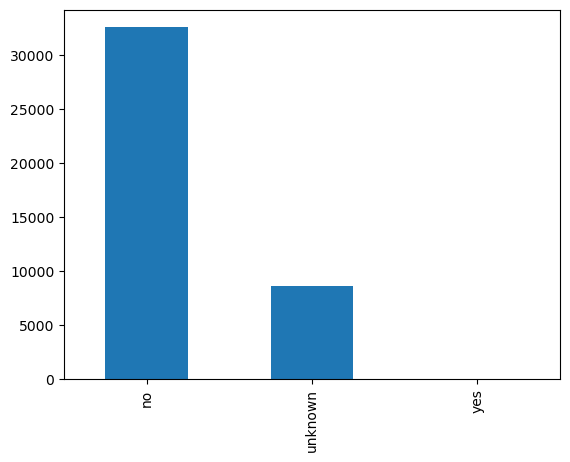

Housing:


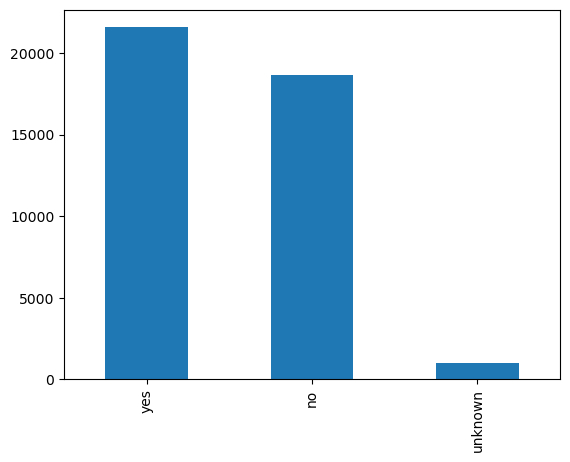

Loan:


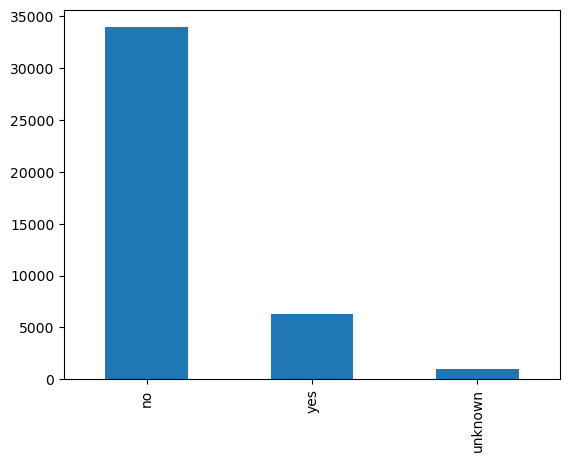

Contact:


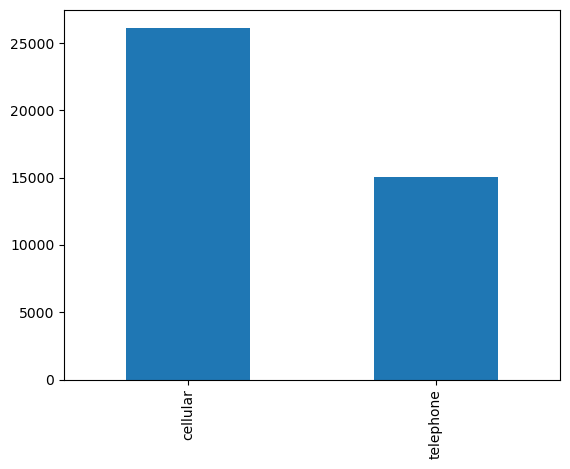

Month:


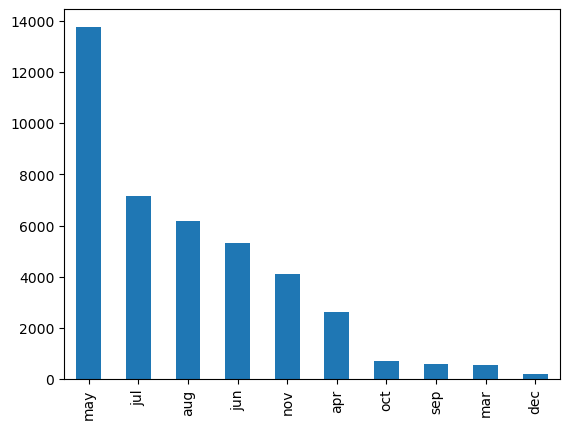

Day_of_week:


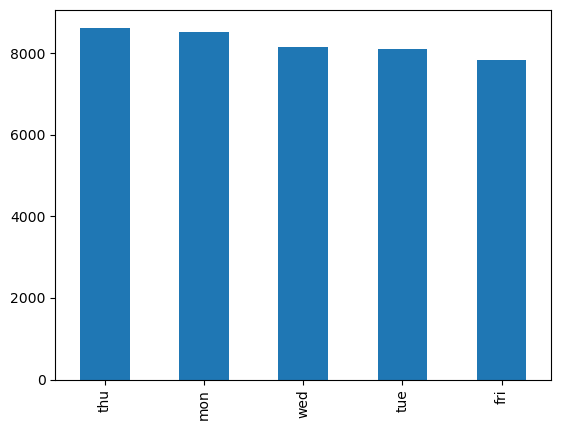

Poutcome:


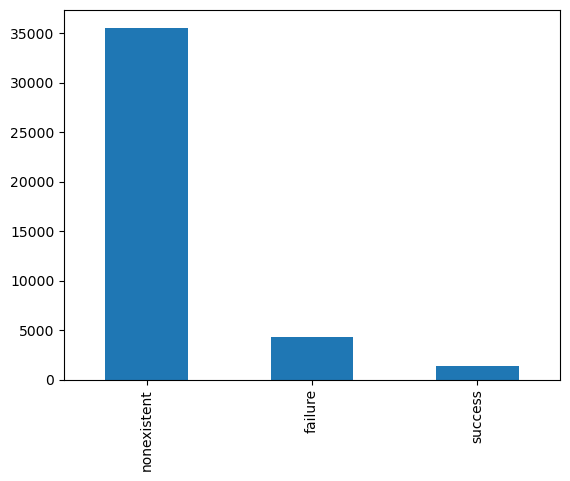

Y:


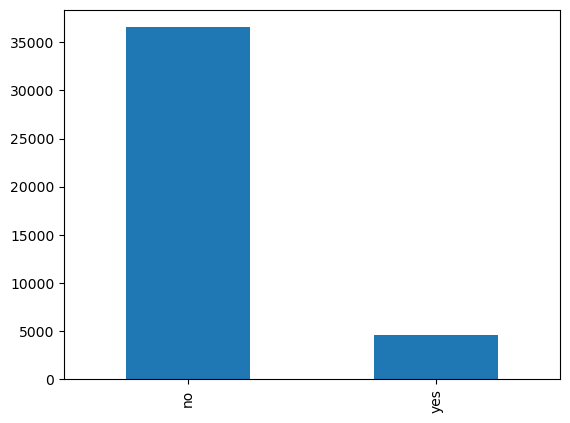

In [102]:
print("Categorical variables:")
for col in categoricalCols:
    print(col.capitalize() + ":")
    data.loc[:,col].value_counts().plot(kind='bar')
    plt.show()

## Identify errors or outliers - univariate analysis

In [154]:
print("Outliers count in numeric variables:")
for col in numericCols:
    count = len(data[data.loc[:,col]>data.loc[:,col].mean()+2*data.loc[:,col].std()])
    print(col.capitalize() + ":", count)

#data[data.age>data.age.mean()+2*data.age.std()]

nineninenineData = data[data.pdays == 999]
nineninenineData = nineninenineData[nineninenineData.previous != 0]

print("Case 999 and != 0:", len(nineninenineData))
display(nineninenineData)

Outliers count in numeric variables:
Age: 910
Duration: 1902
Campaign: 1377
Pdays: 0
Previous: 1064
Emp.var.rate: 0
Cons.price.idx: 128
Cons.conf.idx: 1071
Euribor3m: 0
Nr.employed: 0
Case 999 and != 0: 4110


age            job   marital            education  default  housing     loan    contact month day_of_week  duration  campaign  pdays  previous poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed    y
24013   38    blue-collar    single              unknown       no      yes       no  telephone   oct         tue        39         1    999         1  failure          -0.1          93.798          -40.4      4.968       5195.8   no
24019   40       services   married          high.school       no      yes       no  telephone   oct         tue       144         1    999         1  failure          -0.1          93.798          -40.4      4.968       5195.8  yes
24076   36         admin.   married    university.degree       no      yes       no  telephone   nov         wed       449         1    999         1  failure          -0.1          93.200          -42.0      4.663       5195.8   no
24102   36         admin.   married          high.school       no      yes       no  telephone   nov         wed       114         1    999         1  failure          -0.1          93.200          -42.0      4.286       5195.8  yes
24113   29  self-employed   married    university.degree       no      yes       no  telephone   nov         thu        86         1    999         1  failure          -0.1          93.200          -42.0      4.245       5195.8   no
24124   42     technician  divorced  professional.course       no       no       no   cellular   nov         mon       200         1    999         1  failure          -0.1          93.200          -42.0      4.191       5195.8   no
24135   34         admin.    single          high.school       no       no       no   cellular   nov         mon       303         1    999         1  failure          -0.1          93.200          -42.0      4.191       5195.8   no
24139   44     management   married    university.degree       no      yes       no   cellular   nov         mon       130         1    999         1  failure          -0.1          93.200          -42.0      4.191       5195.8   no
24140   51     technician   married              unknown       no       no       no   cellular   nov         mon       324         1    999         1  failure          -0.1          93.200          -42.0      4.191       5195.8   no
24143   52         admin.   married    university.degree       no      yes      yes   cellular   nov         mon       161         1    999         1  failure          -0.1          93.200          -42.0      4.191       5195.8   no
24146   41   entrepreneur   married    university.degree       no      yes       no   cellular   nov         mon       163         1    999         1  failure          -0.1          93.200          -42.0      4.191       5195.8   no
24157   44        retired    single             basic.9y       no       no       no   cellular   nov         mon       115         1    999         1  failure          -0.1          93.200          -42.0      4.191       5195.8   no
24161   36     unemployed  divorced          high.school       no      yes      yes   cellular   nov         mon        68         1    999         1  failure          -0.1          93.200          -42.0      4.191       5195.8   no
24166   50   entrepreneur   married    university.degree       no       no       no   cellular   nov         mon       134         1    999         1  failure          -0.1          93.200          -42.0      4.191       5195.8   no
24168   41         admin.   married          high.school       no       no       no   cellular   nov         mon       297         1    999         1  failure          -0.1          93.200          -42.0      4.191       5195.8   no
24173   50    blue-collar   married             basic.6y  unknown       no      yes   cellular   nov         mon       120         1    999         1  failure          -0.1          93.200          -42.0      4.191       5195.8   no
24188   43       services   married           

### Easy solution: remove it (last resource)

In [7]:
new= data.drop(16)
new[new.FSIQ>new.FSIQ.mean()+2*new.FSIQ.std()]

Empty DataFrame
Columns: [Gender, FSIQ, VIQ, PIQ, Weight, Height, MRI_Count]
Index: []

Boxplots


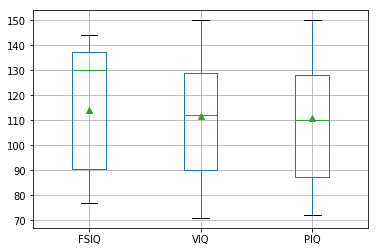

In [8]:
new.boxplot(column=['FSIQ', 'VIQ', 'PIQ'],meanline=False,showmeans=True,return_type='dict')
print("Boxplots")
data=new

### Histograms for qualitative data

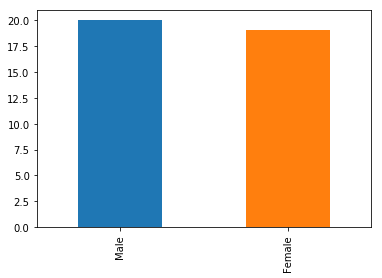

In [9]:
data.Gender.value_counts().plot(kind='bar')

### Univariate analysis depending on label

In [140]:
#groupby_gender = data.groupby('pdays')
#groupby_gender.describe()

print("Numeric variables:")
for col in numericCols:
    print(col.capitalize() + ":")
    groupby = data.groupby(col).y
    display(groupby.describe())


Numeric variables:
Age:


count unique  top freq
age                       
17      5      2   no    3
18     28      2   no   16
19     42      2   no   22
20     65      2   no   42
21    102      2   no   73
..    ...    ...  ...  ...
91      2      1   no    2
92      4      2  yes    3
94      1      1   no    1
95      1      1   no    1
98      2      1  yes    2

[78 rows x 4 columns]

Duration:


count unique  top freq
duration                       
0            4      1   no    4
1            3      1   no    3
2            1      1   no    1
3            3      1   no    3
4           12      1   no   12
...        ...    ...  ...  ...
3631         1      1  yes    1
3643         1      1  yes    1
3785         1      1   no    1
4199         1      1  yes    1
4918         1      1   no    1

[1544 rows x 4 columns]

Campaign:


count unique top   freq
campaign                         
1         17642      2  no  15342
2         10570      2  no   9359
3          5341      2  no   4767
4          2651      2  no   2402
5          1599      2  no   1479
...         ...    ...  ..    ...
40            2      1  no      2
41            1      1  no      1
42            2      1  no      2
43            2      1  no      2
56            1      1  no      1

[42 rows x 4 columns]

Pdays:


count unique  top   freq
pdays                          
0         15      2  yes     10
1         26      2   no     18
2         61      2  yes     37
3        439      2  yes    298
4        118      2  yes     63
...      ...    ...  ...    ...
22         3      2  yes      2
25         1      1  yes      1
26         1      1  yes      1
27         1      1  yes      1
999    39673      2   no  36000

[27 rows x 4 columns]

Previous:


count unique  top   freq
previous                          
0         35563      2   no  32422
1          4561      2   no   3594
2           754      2   no    404
3           216      2  yes    128
4            70      2  yes     38
5            18      2  yes     13
6             5      2  yes      3
7             1      1   no      1

Emp.var.rate:


count unique  top   freq
emp.var.rate                          
-3.4           1071      2   no    617
-3.0            172      2  yes     88
-2.9           1663      2   no   1069
-1.8           9184      2   no   7723
-1.7            773      2  yes    403
-1.1            635      2   no    334
-0.2             10      2   no      9
-0.1           3683      2   no   3451
 1.1           7763      2   no   7523
 1.4          16234      2   no  15368

Cons.price.idx:


count unique  top  freq
cons.price.idx                        
92.201           770      2   no   506
92.379           267      2   no   161
92.431           447      2   no   267
92.469           178      2   no   112
92.649           357      2   no   189
...              ...    ...  ...   ...
94.199           303      2   no   153
94.215           311      2  yes   176
94.465          4374      2   no  4186
94.601           204      2   no   111
94.767           128      2   no    70

[26 rows x 4 columns]

Cons.conf.idx:


count unique  top  freq
cons.conf.idx                        
-50.8           128      2   no    70
-50.0           282      2   no   156
-49.5           204      2   no   111
-47.1          2458      2   no  2016
-46.2          5794      2   no  5270
...             ...    ...  ...   ...
-33.0           172      2  yes    88
-31.4           770      2   no   506
-30.1           357      2   no   189
-29.8           267      2   no   161
-26.9           447      2   no   267

[26 rows x 4 columns]

Euribor3m:


count unique  top freq
euribor3m                       
0.634         8      2  yes    6
0.635        43      2  yes   22
0.636        14      2   no   11
0.637         6      2  yes    5
0.638         7      2  yes    5
...         ...    ...  ...  ...
4.967       643      2   no  610
4.968       992      2   no  935
4.970       172      2   no  168
5.000         7      2   no    4
5.045         9      2  yes    5

[316 rows x 4 columns]

Nr.employed:


count unique  top   freq
nr.employed                          
4963.6         635      2   no    334
4991.6         773      2  yes    403
5008.7         650      2  yes    369
5017.5        1071      2   no    617
5023.5         172      2  yes     88
...            ...    ...  ...    ...
5099.1        8534      2   no   7442
5176.3          10      2   no      9
5191.0        7763      2   no   7523
5195.8        3683      2   no   3451
5228.1       16234      2   no  15368

[11 rows x 4 columns]

Boxplots separated by Gender


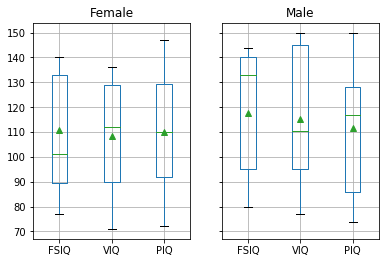

In [11]:
groupby_gender.boxplot(column=['FSIQ', 'VIQ', 'PIQ'],meanline=False,showmeans=True,return_type='dict')
print('Boxplots separated by Gender')

# Bi-variate analysis

Scatter matrixes for correlations betwen numerical variables 


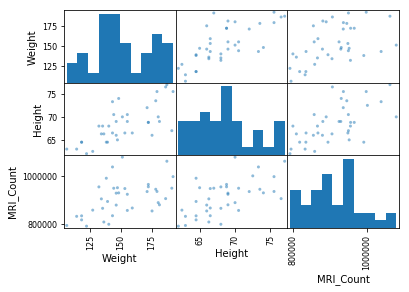

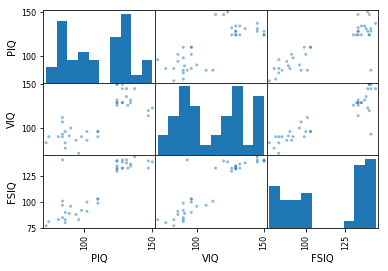

In [12]:
# Scatter matrices for different columns
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])
print('Scatter matrixes for correlations betwen numerical variables ')

In [13]:
print(data.corr(method='pearson'))

            FSIQ    VIQ    PIQ  Weight  Height  MRI_Count
FSIQ       1.000  0.898  0.866 -0.075  -0.119   0.374    
VIQ        0.898  1.000  0.778 -0.053  -0.072   0.361    
PIQ        0.866  0.778  1.000  0.014  -0.077   0.399    
Weight    -0.075 -0.053  0.014  1.000   0.711   0.503    
Height    -0.119 -0.072 -0.077  0.711   1.000   0.607    
MRI_Count  0.374  0.361  0.399  0.503   0.607   1.000    


### Finding errors (or outliers) with bi-variate analysis

In [14]:
# Let's do regression between a pari of numeric varaibales
from scipy.optimize import curve_fit
def fit_func(x, a, b):
    return a*x+b
params = curve_fit(fit_func, data.PIQ,data.FSIQ )
print('a=',params[0][0], 'b=',params[0][1])

# Find errors or outliers
error = data.FSIQ-[fit_func(x,params[0][0],params[0][1]) for x in data.PIQ]
print(np.std(error))
print(error[error>np.mean(error)+2*np.std(error)])

data[data.FSIQ-[fit_func(x,params[0][0],params[0][1]) for x in data.PIQ]==max(data.FSIQ-[fit_func(x,params[0][0],params[0][1]) for x in data.PIQ])]

a= 0.9255547826631081 b= 11.760968823408293
11.990446205250109
8    51.492
Name: FSIQ, dtype: float64


Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
8  Male   141   93   84   134.0   66.3    904858

### Solving the error susbtituting current value by predicted value with linear regression 

In [15]:
data.FSIQ.at[8]= fit_func(data['PIQ'][8],params[0][0],params[0][1])
data.head(10)

Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0  Female  133   132  124  118.0   64.5    816932   
1  Male    140   150  124 NaN      72.5    1001121  
2  Male    139   123  150  143.0   73.3    1038437  
3  Male    133   129  128  172.0   68.8    965353   
4  Female  137   132  134  147.0   65.0    951545   
5  Female  99    90   110  146.0   69.0    928799   
6  Female  138   136  131  138.0   64.5    991305   
7  Female  92    90   98   175.0   66.0    854258   
8  Male    89    93   84   134.0   66.3    904858   
9  Male    133   114  147  172.0   68.8    955466

Scatter matrixes for correlations betwen numeriacal variables 


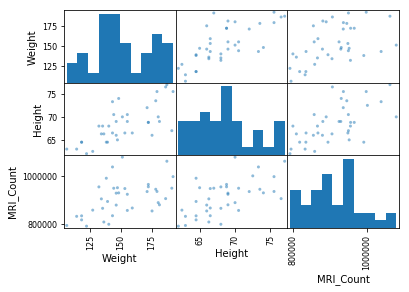

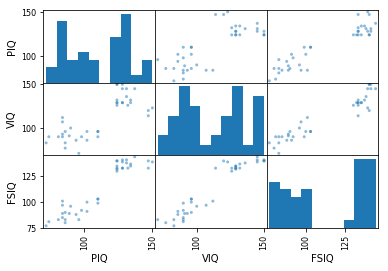

In [16]:
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])
print('Scatter matrixes for correlations betwen numeriacal variables ')

#  Missing data

In [108]:
data.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [144]:
data[data.age.isnull()]

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

In [120]:
data[data.age.isnull()]

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

### Let's solve the case 1 of Weight with regression according to Height because both variables are highly correlated

In [20]:
def fit_func(x, a, b):
    return a*x+b
params = curve_fit(fit_func, data.Height,data.Weight)
print('a=',params[0][0], 'b=',params[0][1])

ValueError: array must not contain infs or NaNs

### First we have to filter the NaNs

In [141]:
df = data.dropna(axis=0)
df

age          job  marital            education  default housing loan    contact month day_of_week  duration  campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed    y
0       56    housemaid  married             basic.4y       no      no   no  telephone   may         mon       261         1    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0   no
1       57     services  married          high.school  unknown      no   no  telephone   may         mon       149         1    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0   no
2       37     services  married          high.school       no     yes   no  telephone   may         mon       226         1    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0   no
3       40       admin.  married             basic.6y       no      no   no  telephone   may         mon       151         1    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0   no
4       56     services  married          high.school       no      no  yes  telephone   may         mon       307         1    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0   no
...    ...          ...      ...                  ...      ...     ...  ...        ...   ...         ...       ...       ...    ...       ...          ...           ...             ...            ...        ...          ...  ...
41183   73      retired  married  professional.course       no     yes   no   cellular   nov         fri       334         1    999         0  nonexistent          -1.1          94.767          -50.8      1.028       4963.6  yes
41184   46  blue-collar  married  professional.course       no      no   no   cellular   nov         fri       383         1    999         0  nonexistent          -1.1          94.767          -50.8      1.028       4963.6   no
41185   56      retired  married    university.degree       no     yes   no   cellular   nov         fri       189         2    999         0  nonexistent          -1.1          94.767          -50.8      1.028       4963.6   no
41186   44   technician  married  professional.course       no      no   no   cellular   nov         fri       442         1    999         0  nonexistent          -1.1          94.767          -50.8      1.028       4963.6  yes
41187   74      retired  married  professional.course       no     yes   no   cellular   nov         fri       239         3    999         1      failure          -1.1          94.767          -50.8      1.028       4963.6   no

[41188 rows x 21 columns]

In [22]:
def fit_func(x, a, b):
    return a*x+b
params = curve_fit(fit_func, df.Height,df.Weight)
print('a=',params[0][0], 'b=',params[0][1])

a= 4.116208241407902 b= -129.92381529971098


In [23]:
idx = data.Weight.isnull()
#data.set_value(idx, 'Weight', fit_func(data['Height'][idx],params[0][0],params[0][1]))

#data.set_value(idx, 'Weight', fit_func(data['Height'][idx],params[0][0],params[0][1]))
print(fit_func(data['Height'][idx],params[0][0],params[0][1]))
data.Weight[idx] = fit_func(data['Height'][idx],params[0][0],params[0][1])

1     168.501
20   NaN     
Name: Height, dtype: float64


C:\Users\Inanna\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### For the remainding Nas, we will replace the value with the average of the column

In [24]:
data.fillna(data.mean())

Gender  FSIQ  VIQ  PIQ   Weight  Height  MRI_Count
0   Female  133   132  124  118.000  64.500  816932   
1   Male    140   150  124  168.501  72.500  1001121  
2   Male    139   123  150  143.000  73.300  1038437  
3   Male    133   129  128  172.000  68.800  965353   
4   Female  137   132  134  147.000  65.000  951545   
5   Female  99    90   110  146.000  69.000  928799   
6   Female  138   136  131  138.000  64.500  991305   
7   Female  92    90   98   175.000  66.000  854258   
8   Male    89    93   84   134.000  66.300  904858   
9   Male    133   114  147  172.000  68.800  955466   
10  Female  132   129  124  118.000  64.500  833868   
11  Male    141   150  128  151.000  70.000  1079549  
12  Male    135   129  124  155.000  69.000  924059   
13  Female  140   120  147  155.000  70.500  856472   
14  Female  96    100  90   146.000  66.000  878897   
15  Female  83    71   96   135.000  68.000  865363   
17  Male    100   96   102  178.000  73.500  945088   
18  Female  101   112  84   136.000  66.300  808020   
19  Male    80    77   86   180.000  70.000  889083   
20  Male    83    83   86   152.145  68.526  892420   
21  Male    97    107  84   186.000  76.500  905940   
22  Female  135   129  134  122.000  62.000  790619   
23  Male    139   145  128  132.000  68.000  955003   
24  Female  91    86   102  114.000  63.000  831772   
25  Male    141   145  131  171.000  72.000  935494   
26  Female  85    90   84   140.000  68.000  798612   
27  Male    103   96   110  187.000  77.000  1062462  
28  Female  77    83   72   106.000  63.000  793549   
29  Female  130   126  124  159.000  66.500  866662   
30  Female  133   126  132  127.000  62.500  857782   
31  Male    144   145  137  191.000  67.000  949589   
32  Male    103   96   110  192.000  75.500  997925   
33  Male    90    96   86   181.000  69.000  879987   
34  Female  83    90   81   143.000  66.500  834344   
35  Female  133   129  128  153.000  66.500  948066   
36  Male    140   150  124  144.000  70.500  949395   
37  Female  88    86   94   139.000  64.500  893983   
38  Male    81    90   74   148.000  74.000  930016   
39  Male    89    91   89   179.000  75.500  935863